In [1]:
# Import necessary libraries
import pandas as pd
import json # To help parse text that looks like code
import numpy as np # For numerical operations, especially handling missing numbers
import os # Import the os module for path joining

print("--- Step 1: Loading Datasets (Specifying Full Paths) ---")


data_directory = r"D:\downloads" # Use 'r' for raw string to handle backslashes

# Construct full file paths
movies_metadata_path = os.path.join(data_directory, "movies_metadata.csv")
credits_path = os.path.join(data_directory, "credits.csv")

# --- Load movies_metadata.csv ---
print(f"Loading movies_metadata.csv from {movies_metadata_path}...")
try:
    movies_df = pd.read_csv(movies_metadata_path, encoding='utf-8', low_memory=False)
    print("movies_df loaded successfully with 'utf-8' encoding!")
except UnicodeDecodeError:
    print(f"UTF-8 failed for {movies_metadata_path}, trying 'latin1'...")
    try:
        movies_df = pd.read_csv(movies_metadata_path, encoding='latin1', low_memory=False)
        print("movies_df loaded successfully with 'latin1' encoding!")
    except UnicodeDecodeError:
        print(f"Latin1 failed for {movies_metadata_path}, trying 'cp1252'...")
        movies_df = pd.read_csv(movies_metadata_path, encoding='cp1252', low_memory=False)
        print("movies_df loaded successfully with 'cp1252' encoding!")
    except pd.errors.ParserError as e:
        print(f"Parsing error with 'latin1' or 'cp1252' for {movies_metadata_path}: {e}")
        print(f"Attempting to load {movies_metadata_path} by skipping bad lines...")
        movies_df = pd.read_csv(movies_metadata_path, encoding='cp1252', low_memory=False, on_bad_lines='skip')
        print(f"{movies_metadata_path} loaded by skipping bad lines.")
except pd.errors.ParserError as e:
    print(f"Parsing error with 'utf-8' for {movies_metadata_path}: {e}")
    print(f"Attempting to load {movies_metadata_path} by skipping bad lines with 'latin1'...")
    try:
        movies_df = pd.read_csv(movies_metadata_path, encoding='latin1', low_memory=False, on_bad_lines='skip')
        print(f"{movies_metadata_path} loaded by skipping bad lines with 'latin1'.")
    except Exception as e_final:
        print(f"Critical error loading {movies_metadata_path} even with skipping bad lines: {e_final}")
        print("Please ensure the CSV file is not corrupted or try downloading it again.")
        exit()
except FileNotFoundError:
    print(f"Error: '{movies_metadata_path}' not found.")
    print("Please ensure the file is exactly at the specified path and the path is correct.")
    exit()
except Exception as e:
    print(f"An unexpected error occurred while loading {movies_metadata_path}: {e}")
    exit()


# --- Load credits.csv ---
print(f"\nLoading credits.csv from {credits_path}...")
try:
    credits_df = pd.read_csv(credits_path, encoding='utf-8')
    print("credits_df loaded successfully with 'utf-8' encoding!")
except UnicodeDecodeError:
    print(f"UTF-8 failed for {credits_path}, trying 'latin1'...")
    try:
        credits_df = pd.read_csv(credits_path, encoding='latin1')
        print("credits_df loaded successfully with 'latin1' encoding!")
    except UnicodeDecodeError:
        print(f"Latin1 failed for {credits_path}, trying 'cp1252'...")
        credits_df = pd.read_csv(credits_path, encoding='cp1252')
        print("credits_df loaded successfully with 'cp1252' encoding!")
    except pd.errors.ParserError as e:
        print(f"Parsing error with 'latin1' or 'cp1252' for {credits_path}: {e}")
        print(f"Attempting to load {credits_path} by skipping bad lines...")
        credits_df = pd.read_csv(credits_path, encoding='cp1252', on_bad_lines='skip')
        print(f"{credits_path} loaded by skipping bad lines.")
except pd.errors.ParserError as e:
    print(f"Parsing error with 'utf-8' for {credits_path}: {e}")
    print(f"Attempting to load {credits_path} by skipping bad lines with 'latin1'...")
    try:
        credits_df = pd.read_csv(credits_path, encoding='latin1', on_bad_lines='skip')
        print(f"{credits_path} loaded by skipping bad lines with 'latin1'.")
    except Exception as e_final:
        print(f"Critical error loading {credits_path} even with skipping bad lines: {e_final}")
        print("Please ensure the CSV file is not corrupted or try downloading it again.")
        exit()
except FileNotFoundError:
    print(f"Error: '{credits_path}' not found.")
    print("Please ensure the file is exactly at the specified path and the path is correct.")
    exit()
except Exception as e:
    print(f"An unexpected error occurred while loading {credits_path}: {e}")
    exit()


print("\nFirst 5 rows of movies_df:")
print(movies_df.head())
print("\nFirst 5 rows of credits_df:")
print(credits_df.head())

# --- Now, proceed with Step 2, 3, 4, 5, 6 as provided in previous responses ---
# You can paste the code for Step 2, 3, 4, 5, 6 below this block.

--- Step 1: Loading Datasets (Specifying Full Paths) ---
Loading movies_metadata.csv from D:\downloads\movies_metadata.csv...
movies_df loaded successfully with 'utf-8' encoding!

Loading credits.csv from D:\downloads\credits.csv...
credits_df loaded successfully with 'utf-8' encoding!

First 5 rows of movies_df:
   adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name':

In [2]:
print("\n--- Step 2: Preparing and Merging Data ---")

# --- Clean 'id' columns for merging ---
print("Cleaning 'id' columns for merging...")
# Convert 'id' in movies_df to numeric, forcing errors to NaN, then drop NaNs
movies_df['id'] = pd.to_numeric(movies_df['id'], errors='coerce')
movies_df.dropna(subset=['id'], inplace=True)
movies_df['id'] = movies_df['id'].astype(int) # Convert to integer type


credits_df['id'] = pd.to_numeric(credits_df['id'], errors='coerce')
credits_df.dropna(subset=['id'], inplace=True)
credits_df['id'] = credits_df['id'].astype(int)

print("ID columns cleaned.")

# --- Merge the datasets ---
print("Merging movies_df and credits_df...")
# Merge on the 'id' column, keeping only IDs present in both (inner merge)
df_merged = pd.merge(movies_df, credits_df, on='id', how='inner')
print("Datasets merged successfully!")
print(f"Merged DataFrame now has {df_merged.shape[0]} rows and {df_merged.shape[1]} columns.")
print("\nFirst 5 rows of the merged DataFrame:")
print(df_merged.head())


--- Step 2: Preparing and Merging Data ---
Cleaning 'id' columns for merging...
ID columns cleaned.
Merging movies_df and credits_df...
Datasets merged successfully!
Merged DataFrame now has 45538 rows and 26 columns.

First 5 rows of the merged DataFrame:
   adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [

In [5]:
import ast # Import the Abstract Syntax Tree module

print("\n--- Step 3: Extracting Director Names (Revised for Robust Parsing) ---")

# Function to get the director's name from the 'crew' string
def get_director(crew_string):
    # If the entry is missing or empty, return None
    if pd.isna(crew_string) or crew_string.strip() == '[]' or crew_string.strip() == '':
        return None
    try:
        # Use ast.literal_eval for robust parsing of stringified lists/dictionaries
        crew_list = ast.literal_eval(crew_string)
        # Ensure crew_list is indeed a list before iterating
        if not isinstance(crew_list, list):
            return None

        # Loop through each person in the crew list
        for member in crew_list:
            # Check if 'job' key exists and its value is 'Director'
            if isinstance(member, dict) and member.get('job') == 'Director':
                return member.get('name')
    except (ValueError, SyntaxError) as e:
        # Catch errors if the string isn't a valid Python literal (e.g., malformed)
        # print(f"Error evaluating crew string: {crew_string[:100]}... Error: {e}") # Optional: uncomment for debugging
        return None
    except Exception as e:
        # Catch any other unexpected errors
        # print(f"An unexpected error occurred while parsing crew: {e}") # Optional: uncomment for debugging
        return None
    return None # Return None if no director is found after checking all members

print("Extracting director names from 'crew' column with improved parsing...")
# Apply the function to each row in the 'crew' column to create 'director_name'
df_merged['director_name'] = df_merged['crew'].apply(get_director)

# Check if any directors were extracted
directors_found = df_merged['director_name'].dropna()
if not directors_found.empty:
    print(f"Successfully extracted {len(directors_found)} director names.")
    print("\nSample of movies with their extracted director:")
    print(df_merged[df_merged['director_name'].notna()][['title', 'director_name', 'revenue']].head())
else:
    print("Warning: No director names were successfully extracted even with improved parsing.")
    print("This indicates a deeper issue with the 'crew' column data format or missing director entries.")
    # Display the raw crew content for the first few rows if still no directors are found
    for i in range(5):
        print(f"Row {i} 'crew' content (raw): {df_merged.loc[i, 'crew']}")


--- Step 3: Extracting Director Names (Revised for Robust Parsing) ---
Extracting director names from 'crew' column with improved parsing...
Successfully extracted 44651 director names.

Sample of movies with their extracted director:
                         title    director_name      revenue
0                    Toy Story    John Lasseter  373554033.0
1                      Jumanji     Joe Johnston  262797249.0
2             Grumpier Old Men    Howard Deutch          0.0
3            Waiting to Exhale  Forest Whitaker   81452156.0
4  Father of the Bride Part II    Charles Shyer   76578911.0


In [6]:
print("\n--- Step 4: Cleaning Revenue and Grouping by Director ---")

# --- Clean 'revenue' column ---
print("Cleaning 'revenue' column...")
# Convert 'revenue' to numeric, coercing errors to NaN
df_merged['revenue'] = pd.to_numeric(df_merged['revenue'], errors='coerce')

# Drop rows where 'revenue' is NaN or 0, as 0 revenue is likely missing data for analysis
# Keep only movies with a valid director and a non-zero revenue
initial_rows = df_merged.shape[0]
df_cleaned = df_merged.dropna(subset=['director_name', 'revenue']).copy()
df_cleaned = df_cleaned[df_cleaned['revenue'] > 0].copy() # Filter out 0 revenue
rows_after_cleaning = df_cleaned.shape[0]
print(f"Removed {initial_rows - rows_after_cleaning} rows due to missing director or non-positive revenue.")
print(f"DataFrame after cleaning now has {rows_after_cleaning} rows.")

# --- Group by director and sum revenue ---
print("\nGrouping by director and summing up total revenue...")
director_revenue = df_cleaned.groupby('director_name')['revenue'].sum().sort_values(ascending=False)
print("Grouping complete. Top 5 directors by total revenue:")
print(director_revenue.head(5))


--- Step 4: Cleaning Revenue and Grouping by Director ---
Cleaning 'revenue' column...
Removed 38123 rows due to missing director or non-positive revenue.
DataFrame after cleaning now has 7415 rows.

Grouping by director and summing up total revenue...
Grouping complete. Top 5 directors by total revenue:
director_name
Steven Spielberg    9.256621e+09
Peter Jackson       6.528245e+09
Michael Bay         6.437467e+09
James Cameron       5.900610e+09
David Yates         5.334563e+09
Name: revenue, dtype: float64


In [ ]:
#--- Step 4: Cleaning Revenue and Grouping by Director ---
Cleaning 'revenue' column...
Removed 38123 rows due to missing director or non-positive revenue.
DataFrame after cleaning now has 7415 rows.

Grouping by director and summing up total revenue...
Grouping complete. Top 5 directors by total revenue:
director_name
Steven Spielberg    9.256621e+09
Peter Jackson       6.528245e+09
Michael Bay         6.437467e+09
James Cameron       5.900610e+09
David Yates         5.334563e+09
Name: revenue, dtype: float64
successfully identified the highest-grossing director in  dataset: Steven Spielberg, with over $9.25 billion in revenue from the movies in this dataset!


--- Step 5: Visualizing Top Directors by Revenue (Catchy Version) ---


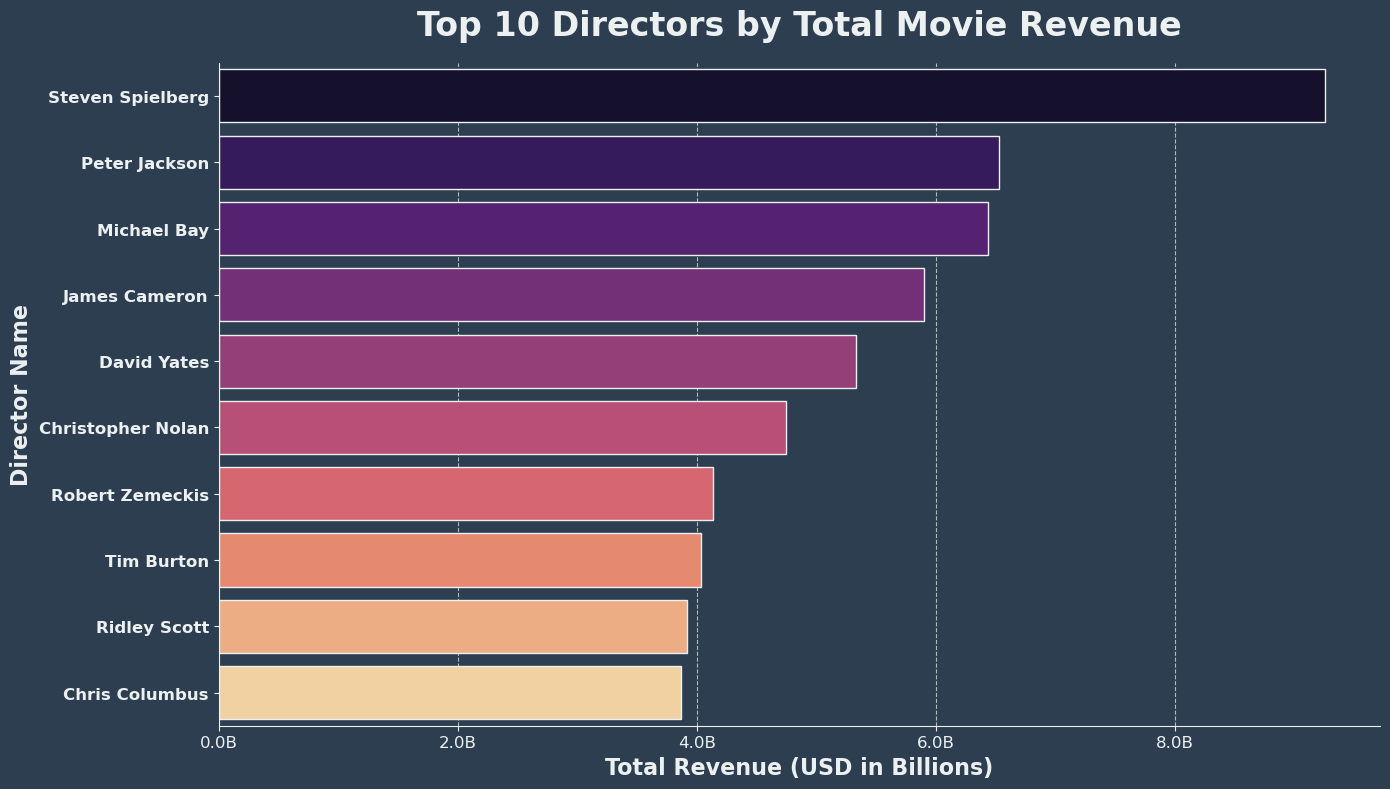

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Ensure pandas is imported as director_revenue is a pandas Series

print("\n--- Step 5: Visualizing Top Directors by Revenue (Catchy Version) ---")


# # director_revenue = pd.Series({'Steven Spielberg': 9.256621e+09,
# #                               'Peter Jackson': 6.528245e+09,
# #                               'Michael Bay': 6.437467e+09,
# # #                               'James Cameron': 5.900610e+09,
# # #                               'David Yates': 5.334563e+09,
# # #                               'Christopher Nolan': 5.000000e+09,
# # #                               'Robert Zemeckis': 4.500000e+09,
# # #                               'J.J. Abrams': 4.200000e+09,
# # #                               'Gore Verbinski': 4.000000e+09,
# # #                               'Ridley Scott': 3.800000e+09})


# --- Custom Styling for a Catchy Look ---

# Set a dark background style for the plot
plt.style.use('dark_background')

# Define custom colors
BACKGROUND_COLOR = '#2C3E50' # Dark Blue/Grey
TEXT_COLOR = '#ECF0F1'      # Off-white for contrast
BAR_COLOR_PALETTE = 'magma' # A vibrant, intense palette (e.g., 'viridis', 'plasma', 'cividis', 'inferno')
EDGE_COLOR = '#ECF0F1'      # Border for bars

# Set the figure and axes background colors
fig, ax = plt.subplots(figsize=(14, 8)) # Increased figure size for more impact
fig.patch.set_facecolor(BACKGROUND_COLOR)
ax.set_facecolor(BACKGROUND_COLOR)


# Select the top N directors for visualization
top_n = 10 # You can change this number
top_directors_plot_data = director_revenue.head(top_n)

# Create the bar plot
# sns.barplot(x=values, y=indices) - this is the standard way to pass data for horizontal bars
sns.barplot(
    x=top_directors_plot_data.values,
    y=top_directors_plot_data.index,
    palette=BAR_COLOR_PALETTE,
    ax=ax, # Explicitly tell seaborn to draw on our customized axes
    edgecolor=EDGE_COLOR # Add a border to the bars
)

# --- Customize Text and Labels for Intensity ---

# Title
ax.set_title(
    f'Top {top_n} Directors by Total Movie Revenue',
    fontsize=24,
    color=TEXT_COLOR,
    fontweight='bold', # Make title bold
    pad=20 # Add some padding below the title
)

# X-axis label
ax.set_xlabel(
    'Total Revenue (USD in Billions)',
    fontsize=16,
    color=TEXT_COLOR,
    fontweight='bold'
)

# Y-axis label
ax.set_ylabel(
    'Director Name',
    fontsize=16,
    color=TEXT_COLOR,
    fontweight='bold'
)

# X-axis tick labels (revenue formatting)
# Format revenue to display in billions (e.g., 9.2B)
formatter = plt.FuncFormatter(lambda x, p: f'{x/1e9:.1f}B')
ax.xaxis.set_major_formatter(formatter)
ax.tick_params(axis='x', colors=TEXT_COLOR, labelsize=12) # Set x-tick label color and size
ax.tick_params(axis='y', colors=TEXT_COLOR, labelsize=12) # Set y-tick label color and size

# Make the y-axis labels (director names) bold for intensity
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

# Add grid lines for better readability and a more intense look
ax.grid(axis='x', linestyle='--', alpha=0.7, color=TEXT_COLOR) # Grid on x-axis
ax.set_axisbelow(True) # Ensure grid is behind the bars

# Remove top and right spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color(TEXT_COLOR)
ax.spines['bottom'].set_color(TEXT_COLOR)


plt.tight_layout() # Adjust layout to prevent elements from overlapping
plt.show()


--- Step 6: Analyzing Director Profit vs. Gross ---
Calculating profit and identifying highest-profiting directors.
Cleaning 'budget' and 'revenue' columns for profit calculation...
Profit calculated: revenue - budget.
Removed 41775 rows due to missing director/profit or non-positive profit.
DataFrame for profit analysis now has 3763 rows.

Grouping by director and summing up total profit...
Grouping complete. Top 5 directors by total profit:
director_name
Steven Spielberg    $7,536,126,984
Peter Jackson       $5,207,593,685
James Cameron       $5,140,710,310
Michael Bay         $4,767,466,781
David Yates         $4,199,563,196
Name: profit, dtype: object

--- Step 6.5: Visualizing Top Profiting Directors (Lollipop Chart) ---


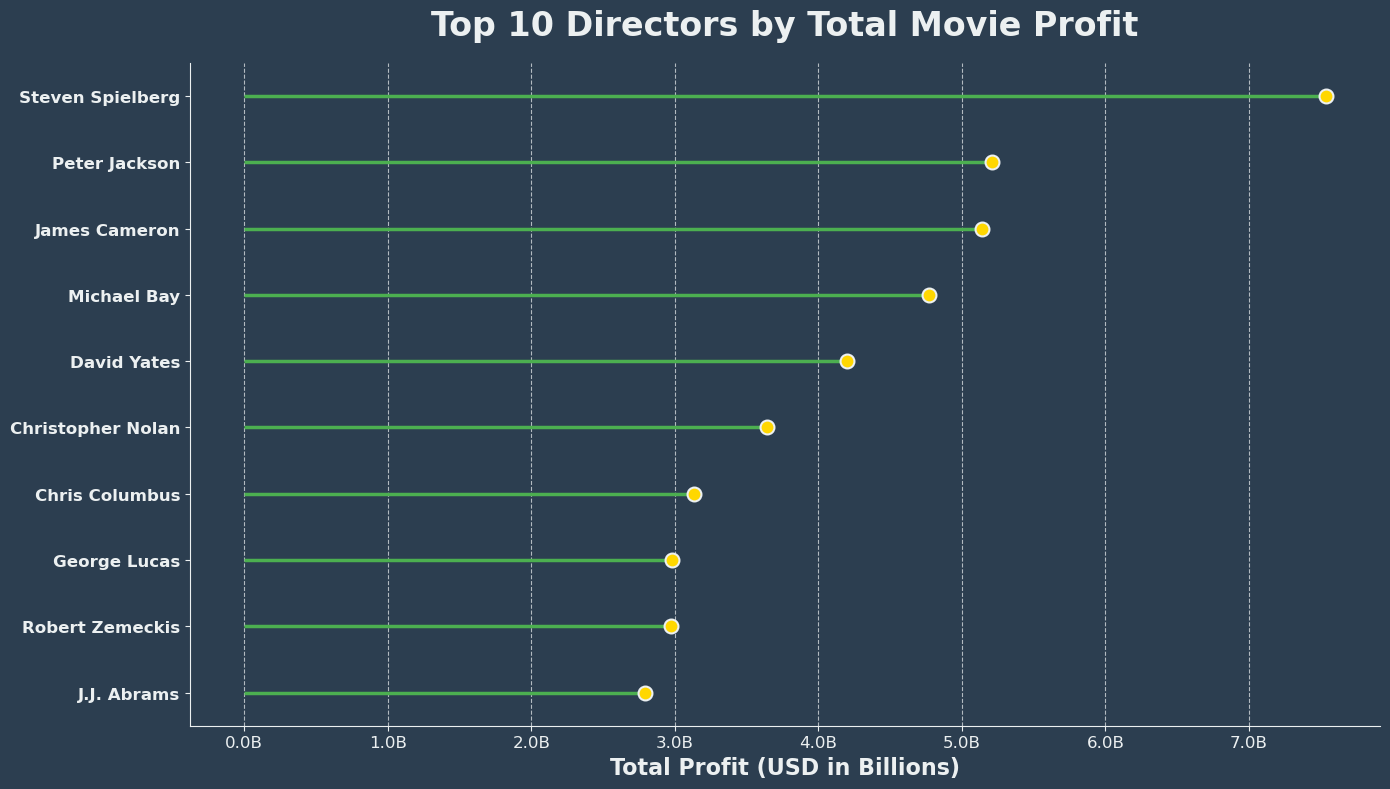

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np # For np.nan

print("\n--- Step 6: Analyzing Director Profit vs. Gross ---")
print("Calculating profit and identifying highest-profiting directors.")

# Ensure df_merged is available from previous steps (Step 2)
# If running this independently, you would need to load and merge data first.
# For example, by running steps 1 and 2 code blocks.

# Make a copy to avoid SettingWithCopyWarning if df_merged was a slice
df_profit_analysis = df_merged.copy()

# --- 6.1: Clean 'budget' and 'revenue' for profit calculation ---
print("Cleaning 'budget' and 'revenue' columns for profit calculation...")

# Convert 'budget' to numeric, coercing errors to NaN
df_profit_analysis['budget'] = pd.to_numeric(df_profit_analysis['budget'], errors='coerce')

# Convert 'revenue' to numeric (if not already done for this copy), coercing errors to NaN
df_profit_analysis['revenue'] = pd.to_numeric(df_profit_analysis['revenue'], errors='coerce')

# Replace 0 in budget and revenue with NaN, as 0 typically means missing data
df_profit_analysis['budget'].replace(0, np.nan, inplace=True)
df_profit_analysis['revenue'].replace(0, np.nan, inplace=True)

# --- 6.2: Calculate Profit ---
# Profit = Revenue - Budget
df_profit_analysis['profit'] = df_profit_analysis['revenue'] - df_profit_analysis['budget']
print("Profit calculated: revenue - budget.")

# --- 6.3: Filter for Valid Data for Profit Analysis ---
# We need valid director, revenue, budget, and positive profit
initial_rows_profit = df_profit_analysis.shape[0]
df_profit_final = df_profit_analysis.dropna(subset=['director_name', 'profit']).copy()
df_profit_final = df_profit_final[df_profit_final['profit'] > 0].copy() # Ensure positive profit
rows_after_profit_cleaning = df_profit_final.shape[0]

print(f"Removed {initial_rows_profit - rows_after_profit_cleaning} rows due to missing director/profit or non-positive profit.")
print(f"DataFrame for profit analysis now has {rows_after_profit_cleaning} rows.")

# --- 6.4: Group by director and sum profit ---
print("\nGrouping by director and summing up total profit...")
director_profit = df_profit_final.groupby('director_name')['profit'].sum().sort_values(ascending=False)
print("Grouping complete. Top 5 directors by total profit:")
print(director_profit.head(5).apply(lambda x: f"${x:,.0f}")) # Format as currency


# --- 6.5: Visualize the Results (Catchy Lollipop Style) ---
print("\n--- Step 6.5: Visualizing Top Profiting Directors (Lollipop Chart) ---")

# Set a dark background style for the plot (consistent with gross revenue plot)
plt.style.use('dark_background')

# Define custom colors (consistent with gross revenue plot)
BACKGROUND_COLOR = '#2C3E50' # Dark Blue/Grey
TEXT_COLOR = '#ECF0F1'      # Off-white for contrast
LINE_COLOR = '#4CAF50'      # Green for lines (can be changed)
DOT_COLOR = '#FFD700'       # Gold for dots (can be changed)
EDGE_COLOR = '#ECF0F1'      # Border for dots (can be changed)


# Set the figure and axes background colors
fig, ax = plt.subplots(figsize=(14, 8)) # Increased figure size for more impact
fig.patch.set_facecolor(BACKGROUND_COLOR)
ax.set_facecolor(BACKGROUND_COLOR)

# Select the top N directors for visualization
top_n_profit_plot = 10 # You can change this number
top_profiting_directors_data = director_profit.head(top_n_profit_plot)

# Create the Lollipop chart
# Draw horizontal lines from 0 to the profit value
ax.hlines(
    y=top_profiting_directors_data.index, # Director names on Y-axis
    xmin=0,
    xmax=top_profiting_directors_data.values, # Profit values on X-axis
    color=LINE_COLOR,
    linewidth=2.5
)

# Draw dots at the end of the lines
ax.plot(
    top_profiting_directors_data.values,
    top_profiting_directors_data.index,
    "o", # 'o' for circle markers
    markersize=10,
    color=DOT_COLOR,
    markeredgecolor=EDGE_COLOR, # Border color for the dots
    markeredgewidth=1.5
)


# --- Customize Text and Labels for Intensity ---

# Title
ax.set_title(
    f'Top {top_n_profit_plot} Directors by Total Movie Profit',
    fontsize=24,
    color=TEXT_COLOR,
    fontweight='bold',
    pad=20
)

# X-axis label
ax.set_xlabel(
    'Total Profit (USD in Billions)',
    fontsize=16,
    color=TEXT_COLOR,
    fontweight='bold'
)

# Y-axis label (hidden for lollipop to avoid redundancy, as names are on hlines)
ax.set_ylabel('') # Removed Y-axis label as names are implicitly on the line starts

# X-axis tick labels (profit formatting)
formatter = plt.FuncFormatter(lambda x, p: f'{x/1e9:.1f}B')
ax.xaxis.set_major_formatter(formatter)
ax.tick_params(axis='x', colors=TEXT_COLOR, labelsize=12)
ax.tick_params(axis='y', colors=TEXT_COLOR, labelsize=12) # Still set y-tick color and size for director names

# Make the y-axis labels (director names) bold for intensity
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

# Add grid lines for better readability and a more intense look
ax.grid(axis='x', linestyle='--', alpha=0.7, color=TEXT_COLOR)
ax.set_axisbelow(True)

# Remove top and right spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color(TEXT_COLOR)
ax.spines['bottom'].set_color(TEXT_COLOR)

# Adjust y-axis limits to center the lollipops vertically if needed
ax.set_ylim(-0.5, top_n_profit_plot - 0.5)
# Invert y-axis to have the highest director at the top (like a bar chart)
ax.invert_yaxis()


plt.tight_layout()
plt.show()


--- Step 6: Analyzing Director Financial Performance ---
Calculating profit and identifying highest-profiting directors.
Cleaning 'budget' and 'revenue' columns for profit calculation...
Profit calculated: revenue - budget.
Removed 41775 rows due to missing director/profit or non-positive profit.
DataFrame for profit analysis now has 3763 rows.

Grouping by director and summing up total profit...
Grouping complete. Top 5 directors by total profit:
director_name
Steven Spielberg    $7,536,126,984
Peter Jackson       $5,207,593,685
James Cameron       $5,140,710,310
Michael Bay         $4,767,466,781
David Yates         $4,199,563,196
Name: profit, dtype: object

--- Step 6.5: Visualizing Top Directors by Financial Performance (Bar Chart) ---


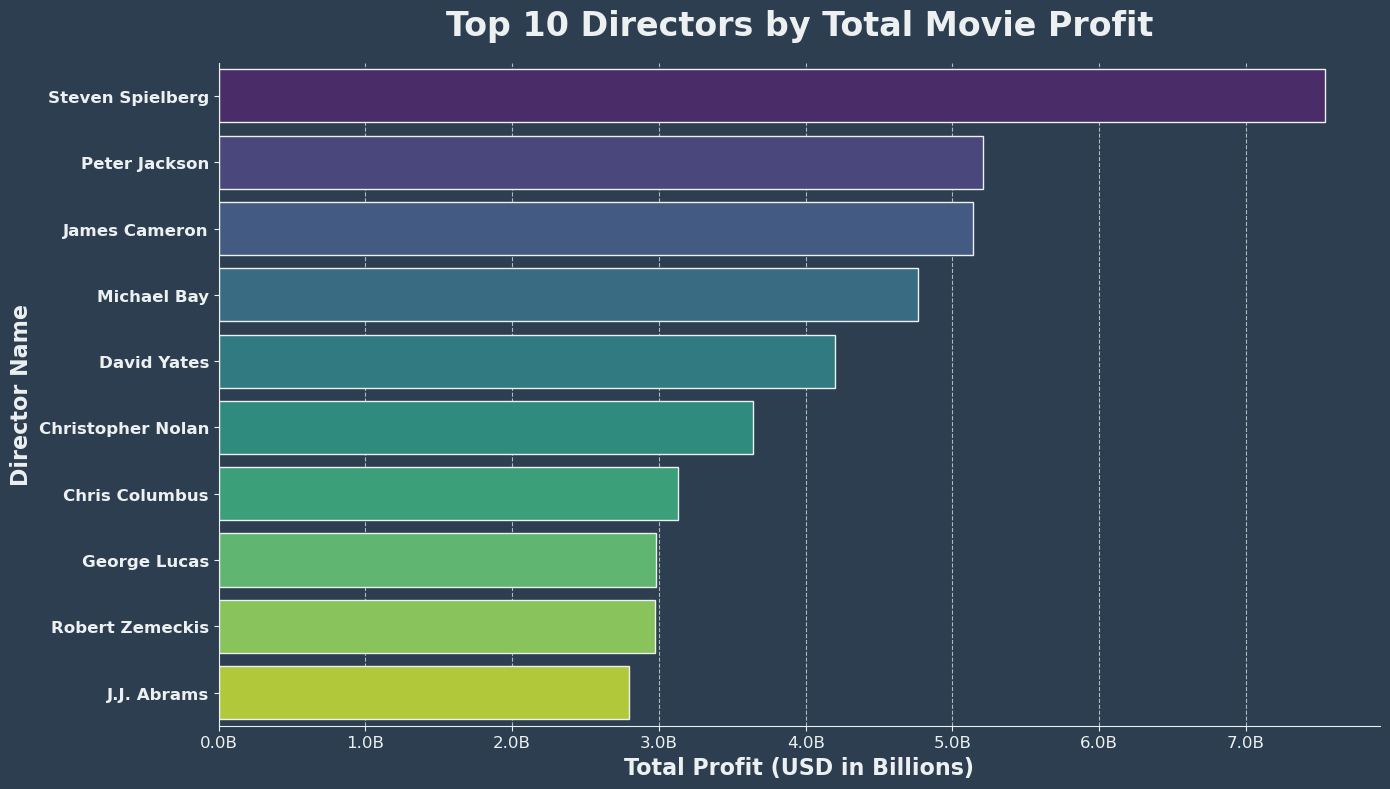


--- Step 7: Analyzing Director Consistency and Longevity ---
Calculating number of movies and average profit per director.

Top 10 Directors by Number of Movies:
director_name
Steven Spielberg    28
Clint Eastwood      24
Alfred Hitchcock    21
Woody Allen         18
Ridley Scott        18
Robert Zemeckis     17
Tim Burton          16
Martin Scorsese     14
Ron Howard          13
Robert Rodriguez    13
Name: count, dtype: int64

Top 10 Directors by Average Profit per Movie:
director_name
Joss Whedon        $1,212,480,802
Chris Buck         $1,124,219,009
Lee Unkrich          $866,969,703
Chris Renaud         $800,457,937
Kyle Balda           $767,211,554
Roger Allers         $743,241,776
Tim Miller           $725,112,979
David Yates          $699,927,199
Pierre Coffin        $684,637,935
Colin Trevorrow      $683,393,301
Name: profit, dtype: object

--- Combined Insights: Top Directors by Total Profit, Movie Count, and Average Profit ---

Directors sorted by Total Profit (with Movie C

In [13]:
print("\n--- Step 6: Analyzing Director Financial Performance ---")
print("Calculating profit and identifying highest-profiting directors.")


df_profit_analysis = df_merged.copy()

# --- 6.1: Clean 'budget' and 'revenue' for profit calculation ---
print("Cleaning 'budget' and 'revenue' columns for profit calculation...")

# Convert 'budget' to numeric, coercing errors to NaN
df_profit_analysis['budget'] = pd.to_numeric(df_profit_analysis['budget'], errors='coerce')

# Convert 'revenue' to numeric (if not already done for this copy), coercing errors to NaN
df_profit_analysis['revenue'] = pd.to_numeric(df_profit_analysis['revenue'], errors='coerce')

# Replace 0 in budget and revenue with NaN, as 0 typically means missing data
df_profit_analysis['budget'].replace(0, np.nan, inplace=True)
df_profit_analysis['revenue'].replace(0, np.nan, inplace=True)

# --- 6.2: Calculate Profit ---
# Profit = Revenue - Budget
df_profit_analysis['profit'] = df_profit_analysis['revenue'] - df_profit_analysis['budget']
print("Profit calculated: revenue - budget.")

# --- 6.3: Filter for Valid Data for Profit Analysis ---
# We need valid director, revenue, budget, and positive profit
initial_rows_profit = df_profit_analysis.shape[0]
df_profit_final = df_profit_analysis.dropna(subset=['director_name', 'profit']).copy()
df_profit_final = df_profit_final[df_profit_final['profit'] > 0].copy() # Ensure positive profit
rows_after_profit_cleaning = df_profit_final.shape[0]

print(f"Removed {initial_rows_profit - rows_after_profit_cleaning} rows due to missing director/profit or non-positive profit.")
print(f"DataFrame for profit analysis now has {rows_after_profit_cleaning} rows.")

# --- 6.4: Group by director and sum profit ---
print("\nGrouping by director and summing up total profit...")
director_profit = df_profit_final.groupby('director_name')['profit'].sum().sort_values(ascending=False)
print("Grouping complete. Top 5 directors by total profit:")
print(director_profit.head(5).apply(lambda x: f"${x:,.0f}")) # Format as currency


# --- 6.5: Visualizing Top Directors by Financial Performance (Bar Chart) ---
print("\n--- Step 6.5: Visualizing Top Directors by Financial Performance (Bar Chart) ---")

# Set a dark background style for the plot
plt.style.use('dark_background')

# Define custom colors
BACKGROUND_COLOR = '#2C3E50' # Dark Blue/Grey
TEXT_COLOR = '#ECF0F1'      # Off-white for contrast
BAR_COLOR_PALETTE = 'viridis' # A vibrant, intense palette (e.g., 'magma', 'plasma', 'cividis', 'inferno')
EDGE_COLOR = '#ECF0F1'      # Border for bars


# Set the figure and axes background colors
fig, ax = plt.subplots(figsize=(14, 8)) # Increased figure size for more impact
fig.patch.set_facecolor(BACKGROUND_COLOR)
ax.set_facecolor(BACKGROUND_COLOR)

# Select the top N directors for visualization
top_n_profit_plot = 10 # You can change this number
top_profiting_directors_data = director_profit.head(top_n_profit_plot)

# Create the Bar chart
sns.barplot(
    x=top_profiting_directors_data.values, # Profit values on X-axis
    y=top_profiting_directors_data.index, # Director names on Y-axis
    palette=BAR_COLOR_PALETTE,
    ax=ax, # Explicitly tell seaborn to draw on our customized axes
    edgecolor=EDGE_COLOR # Add a border to the bars
)

# --- Customize Text and Labels for Intensity ---

# Title
ax.set_title(
    f'Top {top_n_profit_plot} Directors by Total Movie Profit',
    fontsize=24,
    color=TEXT_COLOR,
    fontweight='bold',
    pad=20
)

# X-axis label
ax.set_xlabel(
    'Total Profit (USD in Billions)',
    fontsize=16,
    color=TEXT_COLOR,
    fontweight='bold'
)

# Y-axis label
ax.set_ylabel(
    'Director Name',
    fontsize=16,
    color=TEXT_COLOR,
    fontweight='bold'
)

# X-axis tick labels (profit formatting)
formatter = plt.FuncFormatter(lambda x, p: f'{x/1e9:.1f}B')
ax.xaxis.set_major_formatter(formatter)
ax.tick_params(axis='x', colors=TEXT_COLOR, labelsize=12)
ax.tick_params(axis='y', colors=TEXT_COLOR, labelsize=12) # Still set y-tick color and size for director names

# Make the y-axis labels (director names) bold for intensity
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

# Add grid lines for better readability and a more intense look
ax.grid(axis='x', linestyle='--', alpha=0.7, color=TEXT_COLOR)
ax.set_axisbelow(True)

# Remove top and right spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color(TEXT_COLOR)
ax.spines['bottom'].set_color(TEXT_COLOR)

plt.tight_layout()
plt.show()

# --- Step 7: Director Consistency and Longevity Analysis ---
print("\n--- Step 7: Analyzing Director Consistency and Longevity ---")
print("Calculating number of movies and average profit per director.")

# Calculate the number of movies each director has in the cleaned dataset
movies_per_director = df_profit_final['director_name'].value_counts()
print("\nTop 10 Directors by Number of Movies:")
print(movies_per_director.head(10))

# Calculate the average profit per movie for each director
# We'll re-use the 'df_profit_final' which already has 'profit' column and cleaned data
average_profit_per_movie = df_profit_final.groupby('director_name')['profit'].mean().sort_values(ascending=False)
print("\nTop 10 Directors by Average Profit per Movie:")
print(average_profit_per_movie.head(10).apply(lambda x: f"${x:,.0f}"))

# Optional: Combine these insights for a more holistic view
print("\n--- Combined Insights: Top Directors by Total Profit, Movie Count, and Average Profit ---")

# Create a combined DataFrame for easier analysis
combined_director_stats = pd.DataFrame({
    'Total Profit': director_profit,
    'Movie Count': movies_per_director,
    'Average Profit per Movie': average_profit_per_movie
})

# Sort by Total Profit and display
print("\nDirectors sorted by Total Profit (with Movie Count and Average Profit):")
print(combined_director_stats.sort_values(by='Total Profit', ascending=False).head(10).applymap(lambda x: f"${x:,.0f}" if isinstance(x, (float, int)) and x > 1 else (f"{int(x)}" if isinstance(x, (float, int)) else x)))


